In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#bring in the six packs
df_train = pd.read_excel('data/engdata/SerieA/23-24-E.xlsx')
# df_train['Cluster'] = np.where(df_train['FTR'] == 'D', 1,0)
df_train['Cluster'] = np.where(df_train['MatchGoal'] > 2.5, 1,0)
df_train.tail()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,UltimoScontroDiretto,Last3PointsDifference,GoalRatioDifference,EwmaGoalsSum,GoalsSum,HomePointGap,AwayPointGap,HomeGoalGap,AwayGoalGap,Cluster
375,I1,2024-05-26,19:45:00,Empoli,Roma,2,1,H,1,1,...,A,3.0,-0.945111,4.146760,188,-30,30,-37,37,1
376,I1,2024-05-26,19:45:00,Frosinone,Udinese,0,1,A,0,0,...,D,0.0,-0.032186,5.644400,201,1,-1,8,-8,0
377,I1,2024-05-26,19:45:00,Lazio,Sassuolo,1,1,D,0,0,...,H,8.0,0.695590,5.779803,202,31,-31,6,-6,0
378,I1,2024-05-26,19:45:00,Verona,Inter,2,2,D,2,2,...,A,0.0,-3.615306,6.224400,192,-56,56,-51,51,1
379,I1,2024-06-02,17:00:00,Atalanta,Fiorentina,2,3,A,2,3,...,A,3.0,0.476690,6.578318,211,12,-12,12,-12,1


In [3]:
#descriptive statistics summary
df_train['Cluster'].describe()

count    380.000000
mean       0.492105
std        0.500597
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Cluster, dtype: float64

In [4]:
#skewness and kurtosis
print("Skewness: %f" % df_train['Cluster'].skew())
print("Kurtosis: %f" % df_train['Cluster'].kurt())

Skewness: 0.031708
Kurtosis: -2.009599


In [5]:
df_train['GoalCumulativeSum'] = df_train['HomeGoalsCumulative']	+ df_train['AwayGoalsCumulative']

features = [
    'EloRatio', 'GoalCumulativeSum', 'Cluster', 'GoalsSum', 'GoalsDifference', 'PointsDifference',        'AwayGoalsRatio',
    'HomeGoalsRatio','AwayWins', 'AwayDraws', 'HomeDraws', 'HomeLosses', 'ConcededGoalsDifference', 'HomeLast3Points', 'MatchGoal'

]

<Axes: >

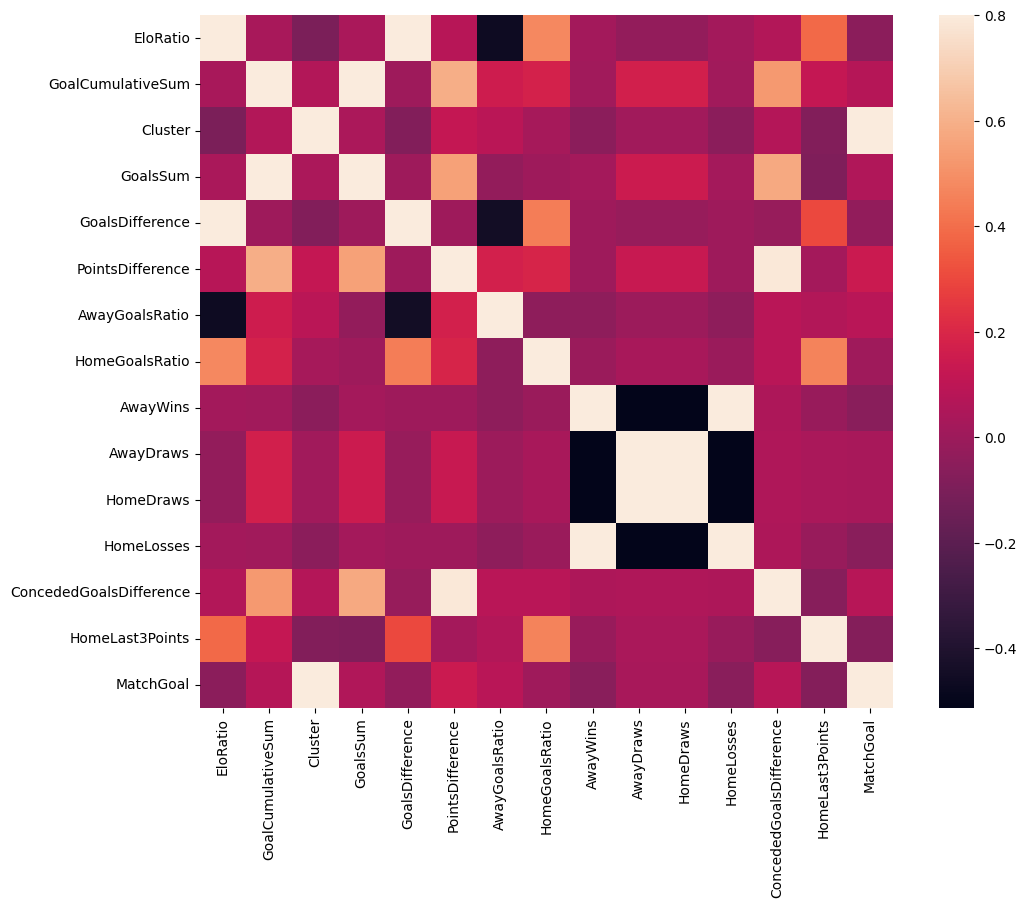

In [6]:
#correlation matrix
corrmat = df_train[features].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)


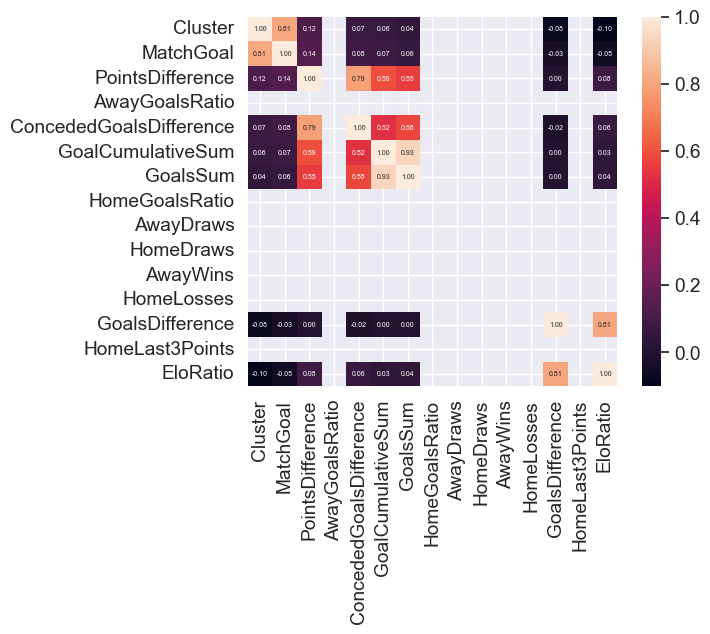

In [7]:
#saleprice correlation matrix
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Cluster')['Cluster'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

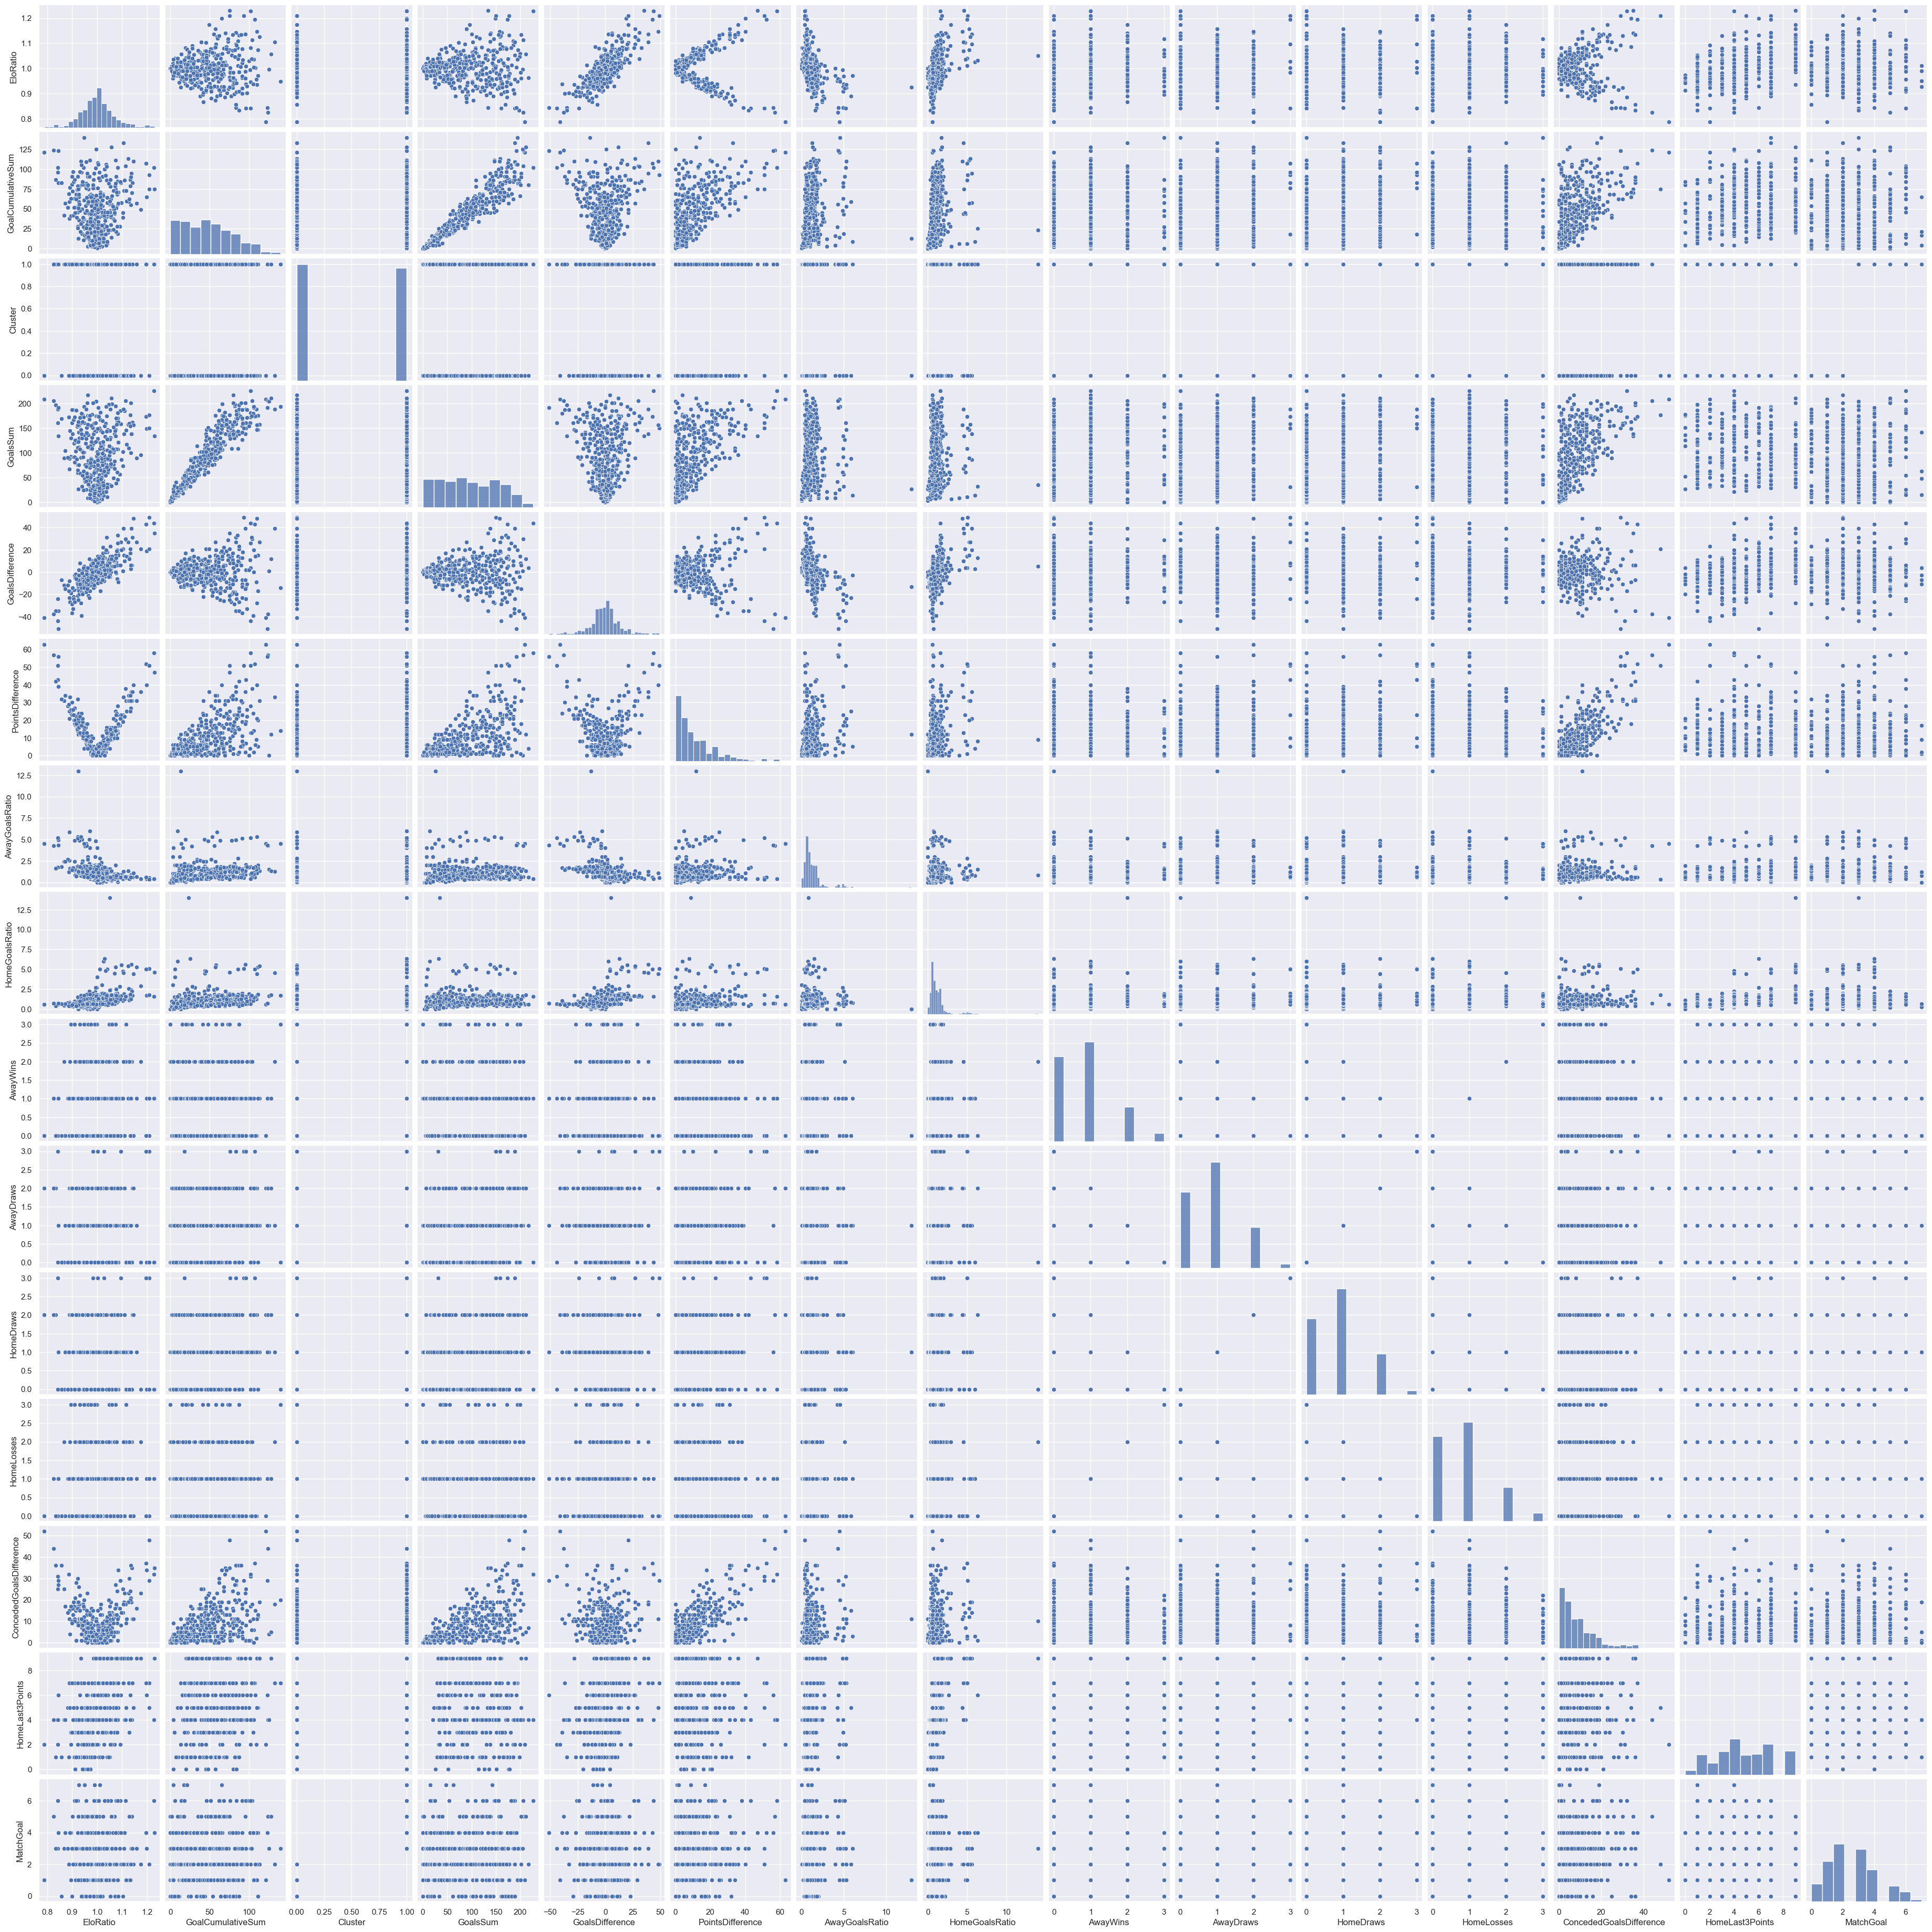

In [8]:
#scatterplot
sns.set()
sns.pairplot(df_train[features], size = 2.5)
plt.show()